<a href="https://colab.research.google.com/github/JulieOnIsland/Data-Analytics/blob/main/Seaborn_Relational_Plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Seaborn

* Data visualization library based on matplotlib
* useful for making various charts related to Statistics and analyzing data
* https://seaborn.pydata.org/index.html


In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.__version__

'0.11.2'

# Figure-level vs. Axes-level function
* Figure-level plot: relplot(relational), displot(distributions), catplot(categorical)
* Axes-level plot: scatterplot, lineplot, histplot, kdeplot, ecdfplot, rugplot, stripplot, swarmplot, boxplot, violinplot, pointplot, barplot

# Style
* provides 5 basic style: ['white'(default), 'dark', 'whitegrid', 'darkgrid', 'ticks']
* `sns.set_style()`
* `sns.set_theme()`

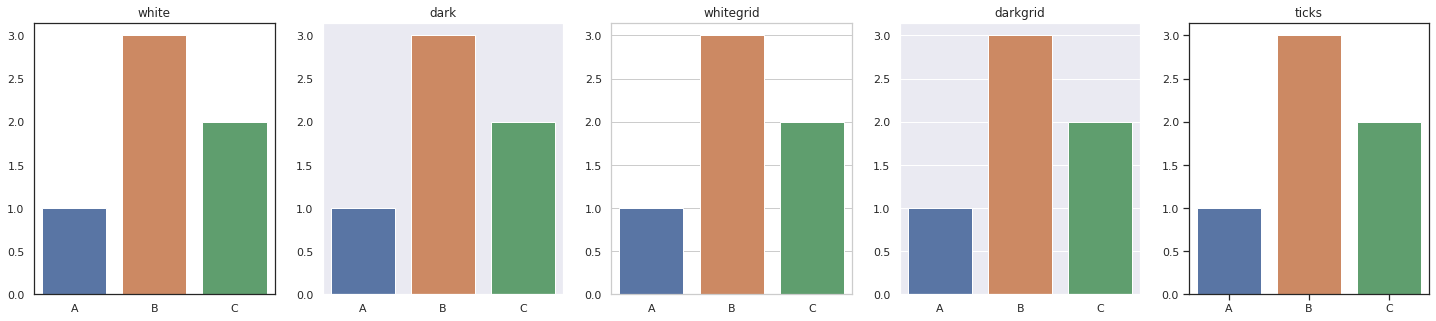

In [ ]:
x = ["A", "B", "C"]
y = [1, 3, 2]

plt.figure(figsize=(25, 5))
sns.set_theme(style="white")
plt.subplot(151)                                # among 1 by 5 plots, first plot ; same as (1, 5, 1) 
sns.barplot(x, y)
plt.title("white")

sns.set_theme(style="dark")
plt.subplot(152)
sns.barplot(x, y)
plt.title("dark")

sns.set_theme(style="whitegrid")                # white color with grid 
plt.subplot(153)
sns.barplot(x, y)
plt.title("whitegrid")

sns.set_theme(style="darkgrid")                 # dark color with grid 
plt.subplot(154)
sns.barplot(x, y)
plt.title("darkgrid")

sns.set_theme(style="ticks")
plt.subplot(155)
sns.barplot(x, y)
plt.title("ticks");

In [ ]:
# let's remove warning message
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
# I'm going to set style as 'darkgrid'
sns.set_style('darkgrid')

# Relational Plot
* Scatter plot
* Line plot

## Scatter plot
* `sns.relplot(kind='scatter')` : figure-level
* `sns.scatterplot(x, y, data, hue, style, size)` : axes-level
    * `hue` : select column to distinguish attribute with color 
    * `style`: select column to distinguish attribute with marker shape
    * `size` : select variable to designate marker's size

In [ ]:
# There are example datasets in seaborn package
# Among them, let's use tips data
sns.load_dataset('tips')             # loading data
tips = sns.load_dataset('tips')
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


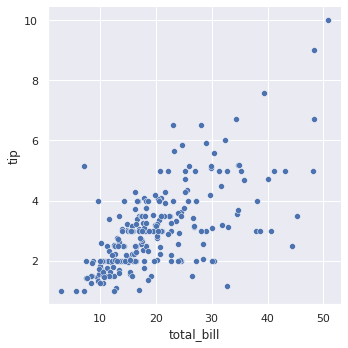

In [ ]:
# default of relplot is "scatter" so there's no need to write kind='scatter'
sns.relplot(kind='scatter', x='total_bill', y='tip', data=tips);

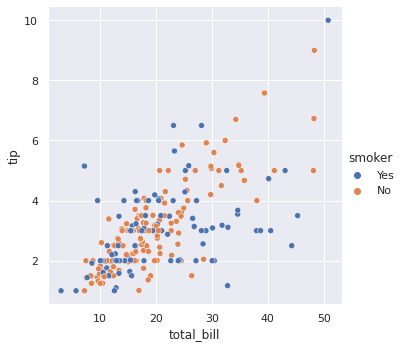

In [ ]:
# change color by group using 'hue' option -> different group, different color
sns.relplot(kind='scatter', x='total_bill', y='tip', data=tips, hue='smoker');

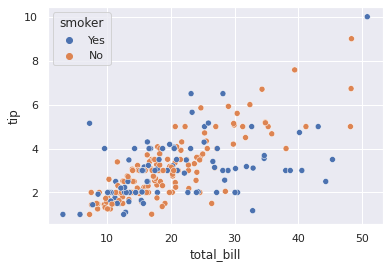

In [ ]:
# if you want to put legend inside, use axes-level function (so use sns.scatterplot instead of sns.relplot)
sns.scatterplot(x='total_bill', y='tip', data=tips, hue='smoker');

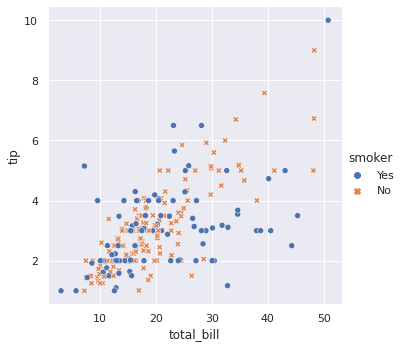

In [ ]:
# you can also change shape using 'style' option
sns.relplot(x='total_bill', y='tip', data=tips, kind='scatter', hue='smoker', style='smoker');

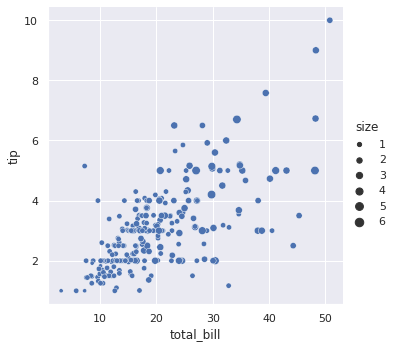

In [ ]:
# you can change the marker's size by number of people using 'size' option 
sns.relplot(x='total_bill', y='tip', data=tips, size='size');

## Line plot
* `sns.relplot(kind='line')` : figure-level
* `sns.lineplot(x, y, data, hue, style, order, estimator, ci)` : axes-level
    * `order` : determine order when distiguishing attribute
    * `estimator` : put statistics
    * `ci`


In [ ]:
# let's use another dataset: flights
flights = sns.load_dataset('flights')
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


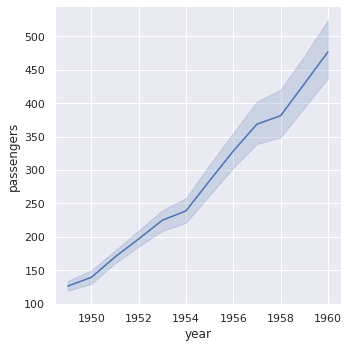

In [ ]:
sns.relplot(kind='line', x='year', y='passengers', data=flights);
# colored portion represents confidence interval

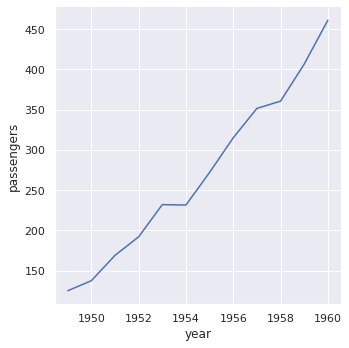

In [ ]:
# estimator = median
# no confidence interval
sns.relplot(kind='line',x='year', y='passengers', data=flights, estimator=np.median, ci=None);

In [ ]:
# estimator can be np.min (minimum value), np.mean (mean) , etc.

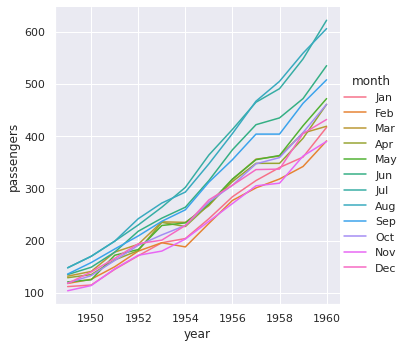

In [ ]:
# distinguish by months 
sns.relplot(kind='line', x='year', y='passengers', data=flights, hue='month');

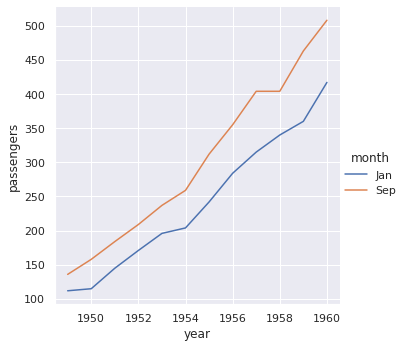

In [ ]:
# Assume we only need Jan and Sep
# by using query, you can set condition
sns.relplot(kind='line',x='year', y='passengers', data=flights.query('month=="Jan" | month == "Sep"'), 
            hue='month', hue_order=['Jan','Sep']);

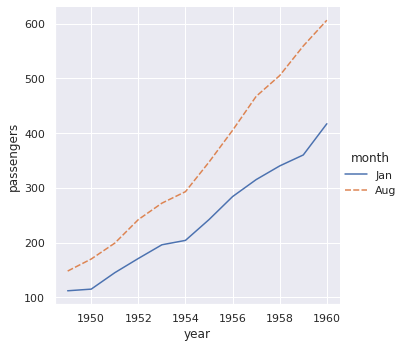

In [ ]:
# change line style
sns.relplot(kind='line',x='year', y='passengers', data=flights.query('month=="Jan" | month == "Aug"'), 
            hue='month', hue_order=['Jan','Aug'],
            style='month', style_order=['Jan','Aug']);

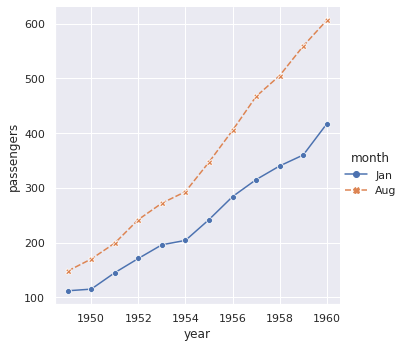

In [ ]:
# put marker
sns.relplot(kind='line',x='year', y='passengers', data=flights.query('month=="Jan" | month == "Aug"'), 
            hue='month', hue_order=['Jan','Aug'],
            style='month', style_order=['Jan','Aug'],
            markers=True);